In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

<div class='alert alert-box alert-success'><b>Логистическая регрессия</b> является частью семейства регрессий, поскольку она предсказывает непрерывное число в диапазлне -- вероятность принадлежности классу. Однако, в отличие от линейной регрессии, она принимает на вход как непрерывные, так и дискретные переменные, а ее результат является качественным. Кроме того, она предсказывает дискретный класс, такой как «Да/Нет» или «Клиент/Неклиент».</div>

In [13]:
df = pd.read_csv('../datasets/kickstarter.csv', dtype = 'unicode')
df.head()

,Id,Name,Url,State,Currency,Top Category,Category,Creator,Location,Updates,...,End Timestamp (UTC),Creator Bio,Creator Website,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
0,1007121454,Nail Art and Photos Printed on your Nails w/ E...,https://www.kickstarter.com/projects/137019948...,failed,USD,Art,Art,Dodie Egolf,Puyallup,0,...,2014/01/14 01:53:49.000,https://www.kickstarter.com/profile/1370199487,NaN,1,0,0,2,297,153,0
1,2032015036,Cold Again,https://www.kickstarter.com/projects/737783165...,failed,USD,Film & Video,Short Film,James Jacobs,Boston,0,...,2014/01/17 02:30:01.000,https://www.kickstarter.com/profile/737783165,NaN,1,4,0,0,276,98,0
2,733782855,Uchu Bijin Jewelry,https://www.kickstarter.com/projects/uchubijin...,failed,USD,Fashion,Fashion,Uchu Bijin,New York,1,...,2014/01/14 01:29:42.000,https://www.kickstarter.com/profile/858150887,http://uchubijin.com,2,2,0,12,1049,66,2
3,514687871,"Poetically Speaking: Stories of Love, Triumph ...",https://www.kickstarter.com/projects/tylicee/p...,failed,USD,Publishing,Poetry,Tylicee Mysreign,Detroit,0,...,2014/02/13 01:12:28.000,https://www.kickstarter.com/profile/1079088465,http://www.linkedin.com/pub/mys-reign/1a/469/4a8,1,2,0,0,309,169,0
4,683545993,Stranger Travels: Teachings from the Heart of ...,https://www.kickstarter.com/projects/197270300...,failed,USD,Publishing,Nonfiction,Ian Driscoll,Pucallpa,0,...,2014/01/14 01:17:46.000,https://www.kickstarter.com/profile/1972703001,http://strangertravels.wordpress.com,1,0,0,6,1636,216,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18142 entries, 0 to 18141
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Id                              18142 non-null  object
 1   Name                            18142 non-null  object
 2   Url                             18142 non-null  object
 3   State                           18142 non-null  object
 4   Currency                        18142 non-null  object
 5   Top Category                    18142 non-null  object
 6   Category                        18142 non-null  object
 7   Creator                         18142 non-null  object
 8   Location                        18142 non-null  object
 9   Updates                         18142 non-null  object
 10  Comments                        18142 non-null  object
 11  Rewards                         18142 non-null  object
 12  Goal                            18142 non-null

In [14]:
df = (
    df
    .drop(columns = ['Id', 
                     'Name', 
                     'Url', 
                     'Location', 
                     'Pledged',
                     'Creator',
                     'Category',
                     'Updates',
                     'Start',
                     'End',
                     'Latitude',
                     'Longitude',
                     'Start Timestamp (UTC)',
                     'End Timestamp (UTC)',
                     'Creator Bio',
                     'Creator Website'
                    ])
)
df.shape

(18142, 19)

## Преобразование нечисловых значений

In [16]:
df = (pd.get_dummies(df, columns = 
        ['State', 'Currency', 'Top Category', 'Facebook Connected', 'Has Video'], drop_first=True))
df.head()

,Comments,Rewards,Goal,Backers,Duration in Days,Facebook Friends,Facebook Shares,Creator - # Projects Created,Creator - # Projects Backed,# Videos,...,Top Category_Food,Top Category_Games,Top Category_Journalism,Top Category_Music,Top Category_Photography,Top Category_Publishing,Top Category_Technology,Top Category_Theater,Facebook Connected_Yes,Has Video_Yes
0,0,9,20000,2,30,272,70,1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,8,3000,5,33,573,57,1,4,0,...,False,False,False,False,False,False,False,False,True,True
2,2,17,5000,62,30,NaN,158,2,2,0,...,False,False,False,False,False,False,False,False,False,False
3,0,4,5000,5,60,1285,2,1,2,0,...,False,False,False,False,False,True,False,False,True,True
4,0,12,12000,16,30,969,411,1,0,0,...,False,False,False,False,False,True,False,False,True,True


## Удаление и заполнение недостающих значений

In [18]:
df.isna().sum()

Comments                             0
Rewards                              0
Goal                                 0
Backers                              0
Duration in Days                     0
Facebook Friends                  5852
Facebook Shares                      0
Creator - # Projects Created         0
Creator - # Projects Backed       4244
# Videos                           101
# Images                             0
# Words (Description)                0
# Words (Risks and Challenges)     101
# FAQs                               0
State_successful                     0
Currency_CAD                         0
Currency_EUR                         0
Currency_GBP                         0
Currency_NZD                         0
Currency_USD                         0
Top Category_Comics                  0
Top Category_Crafts                  0
Top Category_Dance                   0
Top Category_Design                  0
Top Category_Fashion                 0
Top Category_Film & Video

In [31]:
cols_with_na = ['Facebook Friends', 'Creator - # Projects Backed', '# Videos', '# Words (Risks and Challenges)']
missing = [df[f'{x}'].isna().sum() for x in cols_with_na]
cor_to_y = [df['State_successful'].corr(df[f'{x}']).round(6) for x in cols_with_na]
action = ['Fill with mean', 'Fill with mean', 'Remove missing rows', 'Remove missing rows']
pd.DataFrame(np.array([cols_with_na, missing, cor_to_y, action]).T, columns = ['Variable', 'Missing', 'Corr_to_y', 'Action'])

,Variable,Missing,Corr_to_y,Action
0,Facebook Friends,5852,0.15954,Fill with mean
1,Creator - # Projects Backed,4244,0.10625,Fill with mean
2,# Videos,101,0.056579,Remove missing rows
3,# Words (Risks and Challenges),101,0.007545,Remove missing rows


In [33]:
df = (
    df
    .drop(columns = ['# Videos', '# Words (Risks and Challenges)'])
)

In [35]:
df.describe()

,Comments,Rewards,Goal,Backers,Duration in Days,Facebook Friends,Facebook Shares,Creator - # Projects Created,Creator - # Projects Backed,# Images,...,Top Category_Food,Top Category_Games,Top Category_Journalism,Top Category_Music,Top Category_Photography,Top Category_Publishing,Top Category_Technology,Top Category_Theater,Facebook Connected_Yes,Has Video_Yes
count,18142,18142,18142,18142,18142,12290,18142,18142,13898,18142,...,18142,18142,18142,18142,18142,18142,18142,18142,18142,18142
unique,462,66,1124,1150,60,2373,1955,26,125,93,...,2,2,2,2,2,2,2,2,2,2
top,0,8,5000,1,30,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,True
freq,9781,1807,1356,1202,7201,110,1386,14108,4706,6504,...,17033,16519,18069,15410,17604,16091,17155,17495,12290,15053


In [47]:
df = (
    df
    .assign(**{'Facebook Friends': lambda x: x['Facebook Friends'].astype('float64')})
)

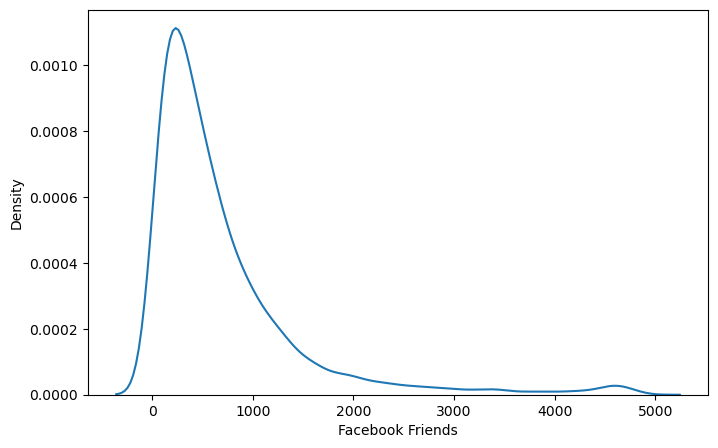

In [51]:
plt.figure(figsize=(8,5))
sns.kdeplot(df, x = 'Facebook Friends');

<AxesSubplot: xlabel='Creator - # Projects Backed', ylabel='Density'>

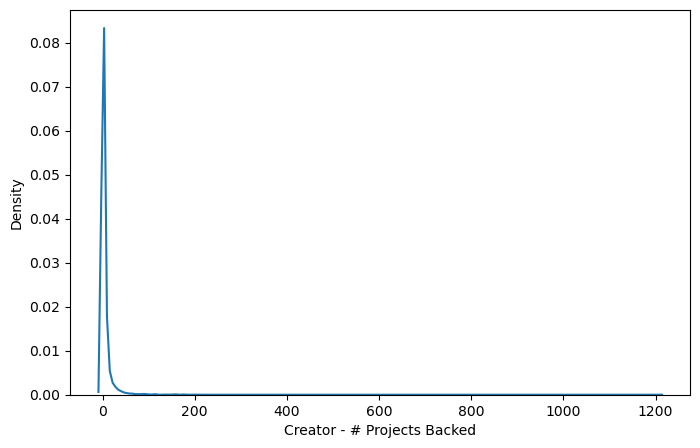

In [55]:
df = (
    df
    .assign(**{'Creator - # Projects Backed': lambda x: x['Creator - # Projects Backed'].astype('float64')})
)
plt.figure(figsize = (8,5))
sns.kdeplot(df, x = 'Creator - # Projects Backed')

In [61]:
df = (
    df
    .assign(**{'Creator - # Projects Backed': lambda x: x['Creator - # Projects Backed'].fillna(x['Creator - # Projects Backed'].mean())})
    .dropna(axis = 0, how = 'any', subset = None)
)

In [65]:
X = df.drop(columns = ['State_successful'])
y = df['State_successful']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

In [67]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [68]:
model_predict = model.predict(X_test)

In [89]:
new_project = pd.DataFrame([
    0, #Comments
    9, #Rewards
    2500, #Goal
    157, #Backers
    31, #Duration in Days
    319, #Facebook Friends
    110, #Facebook Shares
    1, #Creator - # Projects Created
    0, #Creator - # Projects Backed
    12, ## Images
    872, ## Words (Description)
    0, ## FAQs
    0, #Currency_AUD
    1, #Currency_CAD
    0, #Currency_EUR
    0, #Currency_GBP
    0, #Currency_NZD
    0, #Currency_USD
    0, #Top Category_Art
    0, #Top Category_Comics
    0, #Top Category_Crafts
    0, #Top Category_Dance
    0, #Top Category_Design
    0, #Top Category_Fashion
    1, #Top Category_Film & Video
    0, #Top Category_Food
    0, #Top Category_Games
    0, #Top Category_Journalism
    0, #Top Category_Music
    0, #Top Category_Photography
    0, #Top Category_Publishing
    0, #Top Category_Technology
    0, #Top Category_Theater
    #0, #Facebook Connected_No
    #0, #Facebook Connected_Yes
    #0, #Has Video_No
    #1, #Has Video_Yes
], index = X.columns).T

In [90]:
new_pred = model.predict(new_project)

In [91]:
new_pred

array([ True])

In [95]:
pd.DataFrame(confusion_matrix(y_test, model_predict))

,0,1
0,1643,184
1,205,1655


In [98]:
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

       False       0.89      0.90      0.89      1827
        True       0.90      0.89      0.89      1860

    accuracy                           0.89      3687
   macro avg       0.89      0.89      0.89      3687
weighted avg       0.89      0.89      0.89      3687

